In [209]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
def f(x):
  return 3*x**3 - 2*x**2  + 4*x - 1

In [211]:
X = np.random.rand(100, 1)
Y = f(X)

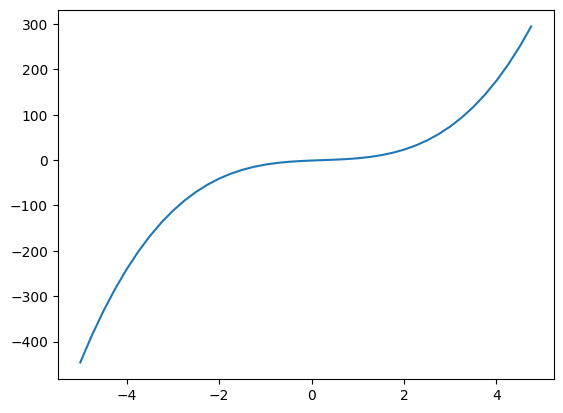

In [212]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [213]:
# Expanding the features for polynomial regression
def polynomial_features(X, degree):
    m = X.shape[0]
    features = []

    for i in range(m):
        row = []
        for d in range(1, degree + 1):
            row.append(X[i][0] ** d)
        features.append(row)

    return np.array(features)

polynomial_features(X, 3)[0:5]

array([[0.1988424 , 0.0395383 , 0.00786189],
       [0.71134195, 0.50600737, 0.35994427],
       [0.79017554, 0.62437738, 0.49336774],
       [0.60595997, 0.36718749, 0.22250092],
       [0.92630088, 0.85803332, 0.79479702]])

In [214]:
def dot_product(X, w, b):
    m = len(X)
    predictions = []

    for i in range(m):
        dot = 0.0
        for j in range(len(X[i])):
            dot += X[i][j] * w[j][0]
        y_hat = dot + b
        predictions.append([y_hat])

    return np.array(predictions)

In [215]:
def compute_gradients(X, error):
    m = len(X)
    n = len(X[0])
    dw = np.zeros((n, 1))
    db = 0.0

    for i in range(m):
        for j in range(n):
            dw[j][0] += X[i][j] * error[i][0]
        db += error[i][0]

    dw *= 2 / m
    db *= 2 / m
    return dw, db

In [216]:
class PolynomialRegression:
    def __init__(self, degree=3, lr=0.001, epochs=10000):
        self.degree = degree
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X_poly = polynomial_features(X, self.degree)
        m, n = X_poly.shape
        self.w = np.zeros((n, 1))
        self.b = 0

        for epoch in range(self.epochs):
            y_pred = dot_product(X_poly, self.w, self.b)
            error = y_pred - y

            dw, db = compute_gradients(X_poly, error)

            for j in range(len(self.w)):
                self.w[j][0] -= self.lr * dw[j][0]
            self.b -= self.lr * db

            if epoch % 100 == 0:
                loss = np.mean(error ** 2)
                
                terms = " + ".join([
                    f"{self.w.ravel()[i]:.4f}x^{self.degree - i}"
                    for i in range(self.degree)
                ])         
                print(f"Epoch {epoch} | Loss: {loss:.4f} | f(x) = {terms} + {self.b:.4f}")


    def predict(self, X):
        X_poly = polynomial_features(X, self.degree)
        return X_poly.dot(self.w) + self.b

In [217]:
model = PolynomialRegression()
model.fit(X, Y)

Epoch 0 | Loss: 2.6906 | f(x) = 0.0017x^3 + 0.0014x^2 + 0.0011x^1 + 0.0021
Epoch 100 | Loss: 1.9001 | f(x) = 0.1522x^3 + 0.1243x^2 + 0.1037x^1 + 0.1750
Epoch 200 | Loss: 1.4357 | f(x) = 0.2715x^3 + 0.2253x^2 + 0.1892x^1 + 0.2944
Epoch 300 | Loss: 1.1546 | f(x) = 0.3672x^3 + 0.3095x^2 + 0.2617x^1 + 0.3740
Epoch 400 | Loss: 0.9770 | f(x) = 0.4451x^3 + 0.3809x^2 + 0.3243x^1 + 0.4243
Epoch 500 | Loss: 0.8584 | f(x) = 0.5096x^3 + 0.4425x^2 + 0.3791x^1 + 0.4528
Epoch 600 | Loss: 0.7739 | f(x) = 0.5638x^3 + 0.4966x^2 + 0.4280x^1 + 0.4655
Epoch 700 | Loss: 0.7094 | f(x) = 0.6102x^3 + 0.5447x^2 + 0.4721x^1 + 0.4665
Epoch 800 | Loss: 0.6572 | f(x) = 0.6506x^3 + 0.5883x^2 + 0.5124x^1 + 0.4591
Epoch 900 | Loss: 0.6127 | f(x) = 0.6864x^3 + 0.6281x^2 + 0.5497x^1 + 0.4457
Epoch 1000 | Loss: 0.5735 | f(x) = 0.7185x^3 + 0.6649x^2 + 0.5844x^1 + 0.4280
Epoch 1100 | Loss: 0.5381 | f(x) = 0.7478x^3 + 0.6993x^2 + 0.6171x^1 + 0.4073
Epoch 1200 | Loss: 0.5057 | f(x) = 0.7747x^3 + 0.7317x^2 + 0.6480x^1 + 0.384

In [218]:
xs = np.linspace(-5, 5, 200).reshape(-1, 1)
ys_pred = model.predict(xs)
ys_pred[0:5]

array([[-149.5438999 ],
       [-144.85269067],
       [-140.26223468],
       [-135.77142713],
       [-131.37916319]])

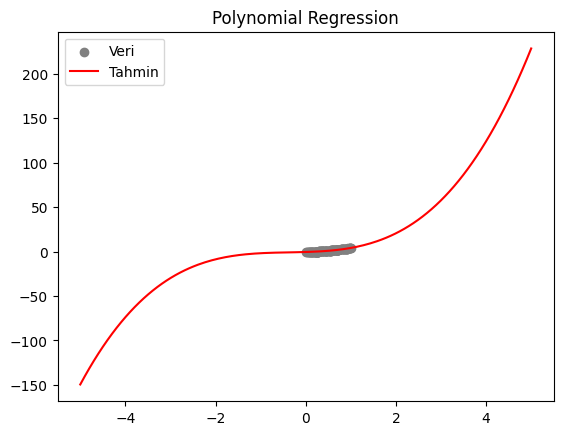

In [219]:
plt.scatter(X, Y, color='gray', label='Veri')
plt.plot(xs, ys_pred, color='red', label='Tahmin')
plt.legend()
plt.title("Polynomial Regression")
plt.show()

In [220]:
## Split the data into training and test sets
def train_test_split(X, y, test_size=0.2, seed=None):
    if seed is not None:
        np.random.seed(seed)
    m = len(X)
    indices = np.random.permutation(m)
    test_size = int(m * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], y[train_indices], X[test_indices], y[test_indices]

X_train, y_train, X_test, y_test = train_test_split(X, Y, test_size=0.2, seed=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80, 1), (20, 1), (20, 1))

In [221]:
## Grid Search 
def grid_search(X_train, y_train, X_test, y_test, degrees, lrs, epochs):
    best_model = None
    best_score = float('inf')
    best_params = None

    for degree in degrees:
        for lr in lrs:
            model = PolynomialRegression(degree=degree, lr=lr, epochs=epochs)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = np.mean((y_pred - y_test) ** 2)

            if score < best_score:
                best_score = score
                best_model = model
                best_params = (degree, lr)

    return best_model, best_params

degrees = [1, 2, 3, 4, 5]
lrs = [0.001, 0.01, 0.1]

best_model, best_params = grid_search(X_train, y_train, X_test, y_test, degrees, lrs, epochs=1000)
print(f"Best Model Parameters: Degree={best_params[0]}, Learning Rate={best_params[1]}")
y_pred = best_model.predict(X_test)


Epoch 0 | Loss: 2.5685 | f(x) = 0.0016x^1 + 0.0020
Epoch 100 | Loss: 2.0336 | f(x) = 0.1513x^1 + 0.1770
Epoch 200 | Loss: 1.6997 | f(x) = 0.2775x^1 + 0.3081
Epoch 300 | Loss: 1.4877 | f(x) = 0.3854x^1 + 0.4051
Epoch 400 | Loss: 1.3497 | f(x) = 0.4789x^1 + 0.4755
Epoch 500 | Loss: 1.2566 | f(x) = 0.5611x^1 + 0.5254
Epoch 600 | Loss: 1.1909 | f(x) = 0.6344x^1 + 0.5594
Epoch 700 | Loss: 1.1420 | f(x) = 0.7007x^1 + 0.5810
Epoch 800 | Loss: 1.1035 | f(x) = 0.7615x^1 + 0.5930
Epoch 900 | Loss: 1.0715 | f(x) = 0.8178x^1 + 0.5977
Epoch 0 | Loss: 2.5685 | f(x) = 0.0164x^1 + 0.0201
Epoch 100 | Loss: 1.0430 | f(x) = 0.8764x^1 + 0.5983
Epoch 200 | Loss: 0.8363 | f(x) = 1.3047x^1 + 0.4570
Epoch 300 | Loss: 0.6769 | f(x) = 1.6612x^1 + 0.2785
Epoch 400 | Loss: 0.5492 | f(x) = 1.9782x^1 + 0.1146
Epoch 500 | Loss: 0.4468 | f(x) = 2.2618x^1 + -0.0324
Epoch 600 | Loss: 0.3648 | f(x) = 2.5157x^1 + -0.1640
Epoch 700 | Loss: 0.2991 | f(x) = 2.7431x^1 + -0.2819
Epoch 800 | Loss: 0.2464 | f(x) = 2.9466x^1 + -

In [225]:
X_train[0:5]

array([[0.16465585],
       [0.98342314],
       [0.2017192 ],
       [0.45653457],
       [0.71227059]])

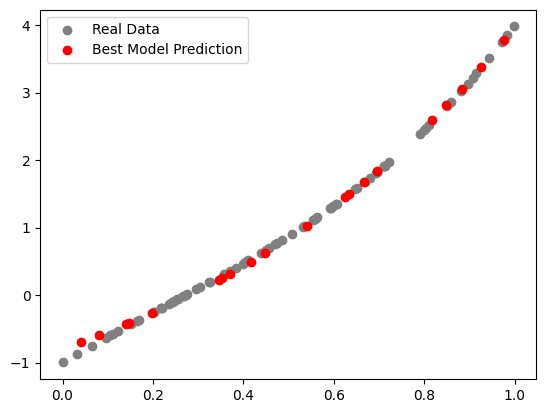

In [224]:
plt.scatter(X_train, f(X_train) , color='gray', label='Real Data')
plt.scatter(X_test, y_pred, color='red', label='Best Model Prediction')
plt.legend()